## Jeremy Marcus Tan - Lab 4

In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
import seaborn as sns



## Breast Cancer Dataset

In [2]:
df = pd.read_csv("Breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
df["diagnosis"].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [4]:
# Check for any missing values
df.isna().any()

mean_radius        False
mean_texture       False
mean_perimeter     False
mean_area          False
mean_smoothness    False
diagnosis          False
dtype: bool

## Data Transformation

In [5]:
# Standard Scaling

columns_to_scale = df.columns[:-1]  
last_column = df.columns[-1]

# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])

# For Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[columns_to_scale] = minmax_scaler.fit_transform(df[columns_to_scale])


## 80-20 Train Test Split

In [6]:
# Original Dataset
train_df_original = df.sample(frac = 0.8, random_state=0)
test_df_original = df.drop(train_df_original.index)

train_X_original = train_df_original.drop(columns={'diagnosis'})
train_y_original = train_df_original['diagnosis']

test_X_original = test_df_original.drop(columns={'diagnosis'})
test_y_original = test_df_original['diagnosis']

In [13]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [7]:
# Normalized Dataset using Standard Scaling
train_df_standard = df_standard_scaled.sample(frac = 0.8, random_state=0)
test_df_standard = df_standard_scaled.drop(train_df_standard.index)

train_X_standard = train_df_standard.drop(columns={'diagnosis'})
train_y_standard = train_df_standard['diagnosis']

test_X_standard = test_df_standard.drop(columns={'diagnosis'})
test_y_standard = test_df_standard['diagnosis']

In [8]:
# Normalized Dataset using Min-Max Scaling
train_df_minmax = df_minmax_scaled.sample(frac = 0.8, random_state=0)
test_df_minmax = df_minmax_scaled.drop(train_df_minmax.index)

train_X_minmax = train_df_minmax.drop(columns={'diagnosis'})
train_y_minmax = train_df_minmax['diagnosis']

test_X_minmax = test_df_minmax.drop(columns={'diagnosis'})
test_y_minmax = test_df_minmax['diagnosis']

In [16]:
# Original Dataset

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=20, p=2)  # p=2 means Euclidean distance
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
report = classification_report(y_test, y_pred)


In [41]:
cm = confusion_matrix(y_test, y_pred)


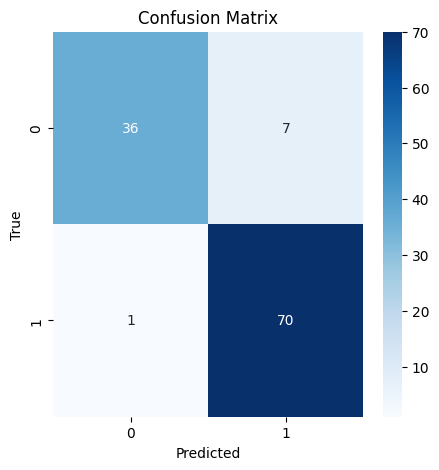

In [42]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), 
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        43
           1       0.91      0.99      0.95        71

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [44]:
accuracy_score(y_test, y_pred)

0.9298245614035088

In [45]:
f1 = f1_score(y_test, y_pred)
f1

0.9459459459459459

In [83]:
roc_auc

0.9115623976416638

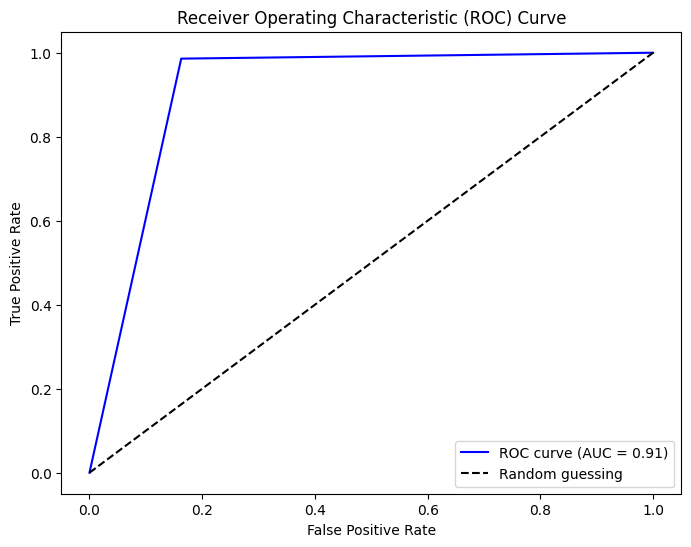

In [82]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [87]:
fpr

array([0.       , 0.1627907, 1.       ])

In [88]:
tpr

array([0.        , 0.98591549, 1.        ])

## K Nearest Neighbors
- Build separate classification models for the standard scaled dataset and min-max scaled dataset
- Use Euclidean Distance 
- Test the accuracy for the models using different values for k (10 - 20)

In [9]:
k_values = list(range(10, 21))
accuracies_standard = []
accuracies_minmax = []


In [10]:
# Standard Scaled Dataset

for k in k_values:
    knn_standard = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 means Euclidean distance
    knn_standard.fit(train_X_standard, train_y_standard)
    
    # Make predictions and calculate accuracy
    y_pred = knn_standard.predict(test_X_standard)
    accuracy = accuracy_score(test_y_standard, y_pred)
    accuracies_standard.append(accuracy)
    
    print(f'k = {k}, Accuracy = {accuracy:.4f}')

k = 10, Accuracy = 0.9474
k = 11, Accuracy = 0.9474
k = 12, Accuracy = 0.9474
k = 13, Accuracy = 0.9474
k = 14, Accuracy = 0.9386
k = 15, Accuracy = 0.9561
k = 16, Accuracy = 0.9386
k = 17, Accuracy = 0.9561
k = 18, Accuracy = 0.9474
k = 19, Accuracy = 0.9474
k = 20, Accuracy = 0.9474


In [11]:
# Minmax Scaled Dataset

train_X_minmax = train_df_minmax.drop(columns={'diagnosis'})
train_y_minmax = train_df_minmax['diagnosis']

test_X_minmax = test_df_minmax.drop(columns={'diagnosis'})
test_y_minmax = test_df_minmax['diagnosis']

for k in k_values:
    knn_minmax = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 means Euclidean distance
    knn_minmax.fit(train_X_minmax, train_y_minmax)
    
    # Make predictions and calculate accuracy
    y_pred = knn_minmax.predict(test_X_minmax)
    accuracy = accuracy_score(test_y_minmax, y_pred)
    accuracies_minmax.append(accuracy)
    
    print(f'k = {k}, Accuracy = {accuracy:.4f}')

k = 10, Accuracy = 0.9386
k = 11, Accuracy = 0.9474
k = 12, Accuracy = 0.9386
k = 13, Accuracy = 0.9386
k = 14, Accuracy = 0.9298
k = 15, Accuracy = 0.9474
k = 16, Accuracy = 0.9386
k = 17, Accuracy = 0.9474
k = 18, Accuracy = 0.9474
k = 19, Accuracy = 0.9561
k = 20, Accuracy = 0.9561


For the KNN model which used the standard scaled data, the values of k which produced the best accuracy (0.9561) on the test set were <b>k = 15</b> and <b>k  = 17</b>.

On the other hand, for the KNN model which used the minmax scaled data, the values of k which produced the best accuracy (0.9561) on the test set were <b>k = 19</b> and <b>k = 20</b>.

## Gaussian Naive Bayes
- three versions: unnormalized, normalized using min-max scaling, and normalized using standard scaling


In [12]:
# Unscaled dataset
nb_unscaled = GaussianNB()
nb_unscaled.fit(train_X_original, train_y_original)
y_pred_unscaled = nb_unscaled.predict(test_X_original)
accuracy_unscaled = accuracy_score(test_y_original, y_pred_unscaled)

In [13]:
# Min-max scaled dataset
nb_minmax = GaussianNB()
nb_minmax.fit(train_X_minmax, train_y_minmax)
y_pred_minmax = nb_minmax.predict(test_X_minmax)
accuracy_minmax = accuracy_score(test_y_minmax, y_pred_minmax)

In [14]:
# Standard scaled dataset
nb_standard = GaussianNB()
nb_standard.fit(train_X_standard, train_y_standard)
y_pred_standard = nb_standard.predict(test_X_standard)
accuracy_standard = accuracy_score(test_y_standard, y_pred_standard)

In [15]:
# Print the results
print("Naive Bayes Model Accuracies:")
print(f"Unnormalized data: {accuracy_unscaled:.4f}")
print(f"Min-Max scaled data: {accuracy_minmax:.4f}")
print(f"Standard scaled data: {accuracy_standard:.4f}")



Naive Bayes Model Accuracies:
Unnormalized data: 0.9123
Min-Max scaled data: 0.9298
Standard scaled data: 0.9298


The models which used the min-max scaled data and the standard scaled data had the same accuracy score (0.9298) on the test set.

## Restaurant Dataset

In [50]:
resto_df = pd.read_csv("Resto.csv")

In [51]:
resto_df
# The first 12 rows will be used to make the decision tree.
# The last 2 rows will be classified using the decision tree.

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Label
0,Yes,No,No,Yes,Some,High,No,Yes,French,0 to 10,Yes
1,Yes,No,No,Yes,Full,Low,No,No,Thai,30 to 60,No
2,No,Yes,No,No,Some,Low,No,No,Burger,0 to 10,Yes
3,Yes,No,Yes,Yes,Full,Low,Yes,No,Thai,10 to 30,Yes
4,Yes,No,Yes,No,Full,High,No,Yes,French,1hr,No
5,No,Yes,No,Yes,Some,Med,Yes,Yes,Italian,0 to 10,Yes
6,No,Yes,No,No,NaN,Low,Yes,No,Burger,0 to 10,No
7,No,No,No,Yes,Some,Med,Yes,Yes,Thai,0 to 10,Yes
8,No,Yes,Yes,No,Full,Low,Yes,No,Burger,1hr,No
9,Yes,Yes,Yes,Yes,Full,High,No,Yes,Italian,10 to 30,No


In [52]:
# Replace the NaN values in the Pat column

resto_df['Pat'] = resto_df['Pat'].fillna("None")


In [53]:
resto_df_label = resto_df.copy()

In [54]:
resto_df_label.columns[0:10]

Index(['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type',
       'Est'],
      dtype='object')

In [55]:
resto_df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Alt     14 non-null     object
 1   Bar     14 non-null     object
 2   Fri     14 non-null     object
 3   Hun     14 non-null     object
 4   Pat     14 non-null     object
 5   Price   14 non-null     object
 6   Rain    14 non-null     object
 7   Res     14 non-null     object
 8   Type    14 non-null     object
 9   Est     14 non-null     object
 10  Label   12 non-null     object
dtypes: object(11)
memory usage: 1.3+ KB


In [56]:
resto_df_label

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Label
0,Yes,No,No,Yes,Some,High,No,Yes,French,0 to 10,Yes
1,Yes,No,No,Yes,Full,Low,No,No,Thai,30 to 60,No
2,No,Yes,No,No,Some,Low,No,No,Burger,0 to 10,Yes
3,Yes,No,Yes,Yes,Full,Low,Yes,No,Thai,10 to 30,Yes
4,Yes,No,Yes,No,Full,High,No,Yes,French,1hr,No
5,No,Yes,No,Yes,Some,Med,Yes,Yes,Italian,0 to 10,Yes
6,No,Yes,No,No,None,Low,Yes,No,Burger,0 to 10,No
7,No,No,No,Yes,Some,Med,Yes,Yes,Thai,0 to 10,Yes
8,No,Yes,Yes,No,Full,Low,Yes,No,Burger,1hr,No
9,Yes,Yes,Yes,Yes,Full,High,No,Yes,Italian,10 to 30,No


## Label Encoding

In [57]:
label_encoders = {}
for column in resto_df.columns[:-1]:
    if resto_df_label[column].dtype == 'object':
        le = LabelEncoder()
        resto_df_label.loc[:, column] = le.fit_transform(resto_df[column])
        label_encoders[column] = le
        print(f"Encoding for {column}:")
        for i, label in enumerate(le.classes_):
            print(f"  {label} -> {i}")


Encoding for Alt:
  No -> 0
  Yes -> 1
Encoding for Bar:
  No -> 0
  Yes -> 1
Encoding for Fri:
  No -> 0
  Yes -> 1
Encoding for Hun:
  No -> 0
  Yes -> 1
Encoding for Pat:
  Full -> 0
  None -> 1
  Some -> 2
Encoding for Price:
  High -> 0
  Low -> 1
  Med -> 2
Encoding for Rain:
  No -> 0
  Yes -> 1
Encoding for Res:
  No -> 0
  Yes -> 1
Encoding for Type:
  Burger -> 0
  French -> 1
  Italian -> 2
  Thai -> 3
Encoding for Est:
  0 to 10 -> 0
  10 to 30 -> 1
  1hr -> 2
  30 to 60 -> 3


In [58]:
label_encoders

{'Alt': LabelEncoder(),
 'Bar': LabelEncoder(),
 'Fri': LabelEncoder(),
 'Hun': LabelEncoder(),
 'Pat': LabelEncoder(),
 'Price': LabelEncoder(),
 'Rain': LabelEncoder(),
 'Res': LabelEncoder(),
 'Type': LabelEncoder(),
 'Est': LabelEncoder()}

In [59]:
resto_df_label

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Label
0,1,0,0,1,2,0,0,1,1,0,Yes
1,1,0,0,1,0,1,0,0,3,3,No
2,0,1,0,0,2,1,0,0,0,0,Yes
3,1,0,1,1,0,1,1,0,3,1,Yes
4,1,0,1,0,0,0,0,1,1,2,No
5,0,1,0,1,2,2,1,1,2,0,Yes
6,0,1,0,0,1,1,1,0,0,0,No
7,0,0,0,1,2,2,1,1,3,0,Yes
8,0,1,1,0,0,1,1,0,0,2,No
9,1,1,1,1,0,0,0,1,2,1,No


In [60]:
# Split features and target

resto_df_train_label = resto_df_label.iloc[0: 12, :]
X_train_label = resto_df_train_label.drop('Label', axis=1)
y_train_label = resto_df_train_label['Label']

# Create and train the decision tree classifier
clf_label = DecisionTreeClassifier(random_state=0)
clf_label.fit(X_train_label, y_train_label)



DecisionTreeClassifier(random_state=0)

In [64]:
# correct order of class_names in the tree
print(clf_label.classes_)


['No' 'Yes']


In [65]:
resto_df_train_label.columns

Index(['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type',
       'Est', 'Label'],
      dtype='object')

Text(0.5, 1.0, 'Decision Tree Classifier')

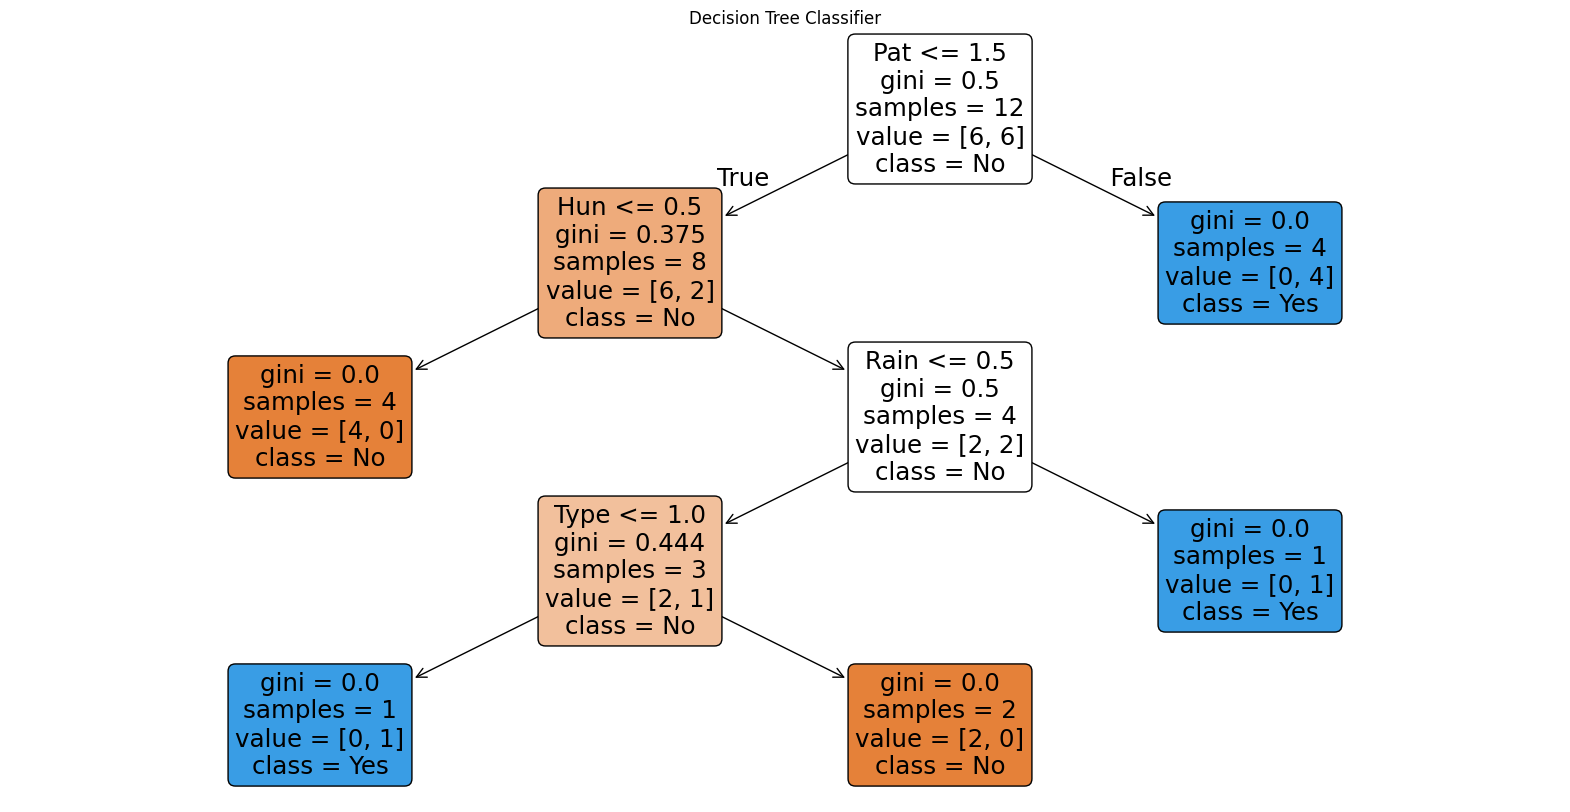

In [66]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_label, filled=True, feature_names=resto_df_train_label.columns, class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree Classifier')


In [28]:
X_test_1_label = resto_df_label.iloc[12, 0:10]
X_test_1_label = pd.DataFrame([X_test_1_label])




In [29]:
X_test_1_label

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est
12,0,1,0,1,2,1,1,1,2,0


In [30]:
y_pred_label_1 = clf_label.predict(X_test_1_label)


In [31]:
y_pred_label_1 # Class = Yes

array(['Yes'], dtype=object)

In [32]:
X_test_2_label = resto_df_label.iloc[13, 0:10]
X_test_2_label = pd.DataFrame([X_test_2_label])


In [33]:
X_test_2_label

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est
13,1,0,1,0,0,1,1,0,3,3


In [34]:
y_pred_label_2 = clf_label.predict(X_test_2_label)


In [35]:
y_pred_label_2 # Class = No

array(['No'], dtype=object)

## One Hot Encoding

In [71]:
X_onehot = resto_df.drop('Label', axis=1)
y_onehot = resto_df['Label']
y_train_onehot = y_onehot[0:12]


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_onehot)

feature_names = encoder.get_feature_names_out(X_onehot.columns)

X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X_encoded_train_df = X_encoded_df.iloc[0:12, :]

In [72]:
X_encoded_df

,Alt_No,Alt_Yes,Bar_No,Bar_Yes,Fri_No,Fri_Yes,Hun_No,Hun_Yes,Pat_Full,Pat_None,...,Res_No,Res_Yes,Type_Burger,Type_French,Type_Italian,Type_Thai,Est_0 to 10,Est_10 to 30,Est_1hr,Est_30 to 60
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [73]:
clf_onehot = DecisionTreeClassifier(random_state=0)
clf_onehot.fit(X_encoded_train_df, y_train_onehot)

DecisionTreeClassifier(random_state=0)

In [75]:
print(clf_onehot.classes_)


['No' 'Yes']


In [76]:
feature_names

array(['Alt_No', 'Alt_Yes', 'Bar_No', 'Bar_Yes', 'Fri_No', 'Fri_Yes',
       'Hun_No', 'Hun_Yes', 'Pat_Full', 'Pat_None', 'Pat_Some',
       'Price_High', 'Price_Low', 'Price_Med', 'Rain_No', 'Rain_Yes',
       'Res_No', 'Res_Yes', 'Type_Burger', 'Type_French', 'Type_Italian',
       'Type_Thai', 'Est_0 to 10', 'Est_10 to 30', 'Est_1hr',
       'Est_30 to 60'], dtype=object)

Text(0.5, 1.0, 'Decision Tree Classifier (One-Hot Encoded Features, Limited Depth)')

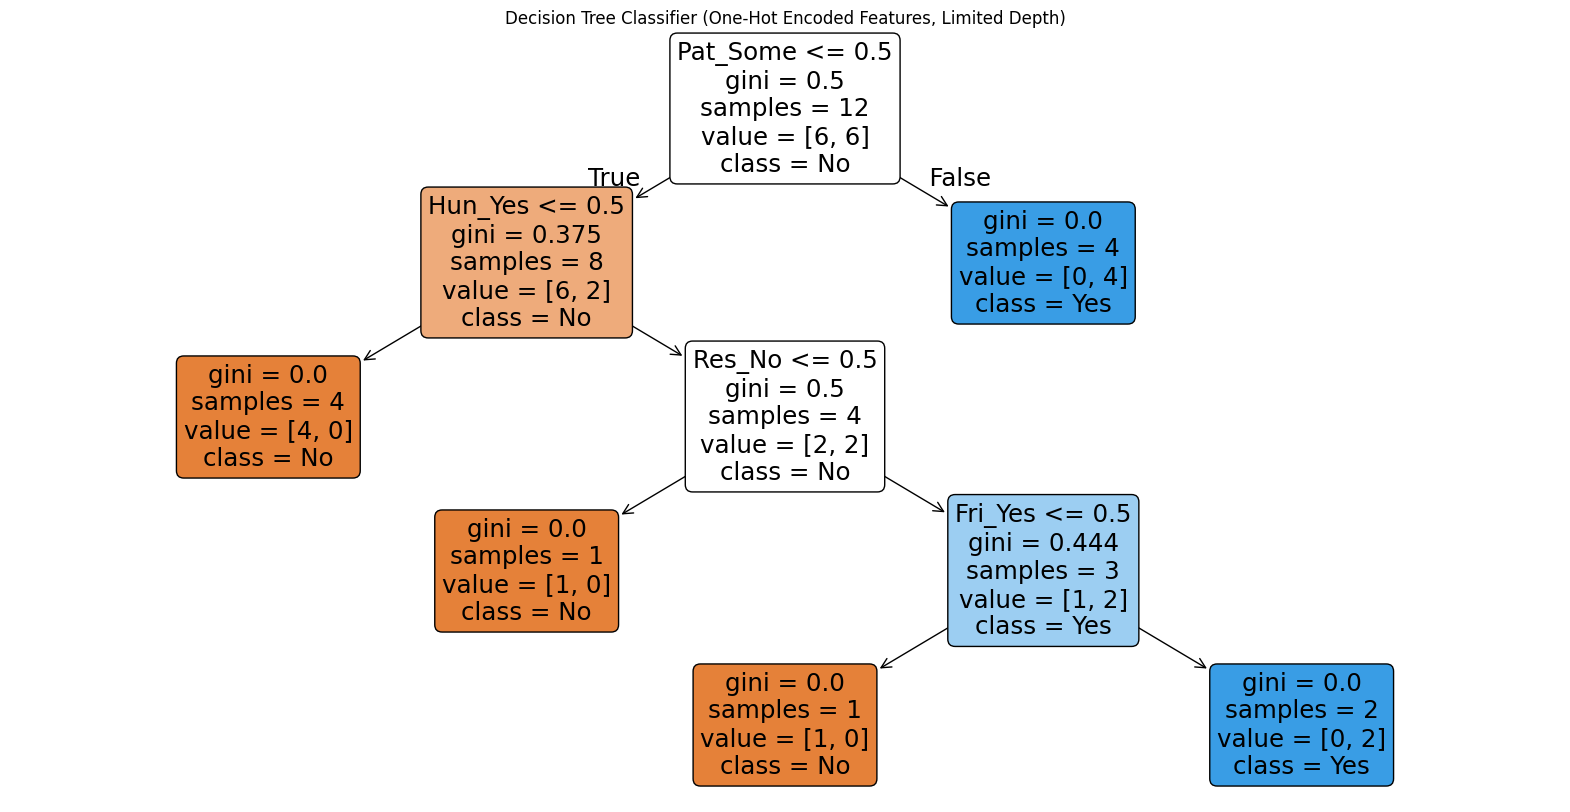

In [74]:
plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf_onehot, 
    filled=True, 
    feature_names=feature_names, 
    class_names=['No', 'Yes'], 
    rounded=True
)
plt.title('Decision Tree Classifier (One-Hot Encoded Features, Limited Depth)')

In [78]:
# Check the last two rows: test instances
X_test_1_onehot = X_encoded_df.iloc[12, :]
X_test_1_onehot = pd.DataFrame([X_test_1_onehot])




In [80]:
X_test_1_onehot

,Alt_No,Alt_Yes,Bar_No,Bar_Yes,Fri_No,Fri_Yes,Hun_No,Hun_Yes,Pat_Full,Pat_None,...,Res_No,Res_Yes,Type_Burger,Type_French,Type_Italian,Type_Thai,Est_0 to 10,Est_10 to 30,Est_1hr,Est_30 to 60
12,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [43]:
y_pred_onehot_1 = clf_onehot.predict(X_test_1_onehot)


In [44]:
y_pred_onehot_1 # Class is Yes

array(['Yes'], dtype=object)

In [45]:
X_test_2_onehot = X_encoded_df.iloc[13, :]
X_test_2_onehot = pd.DataFrame([X_test_2_onehot])




In [46]:
X_test_2_onehot

,Alt_No,Alt_Yes,Bar_No,Bar_Yes,Fri_No,Fri_Yes,Hun_No,Hun_Yes,Pat_Full,Pat_None,...,Res_No,Res_Yes,Type_Burger,Type_French,Type_Italian,Type_Thai,Est_0 to 10,Est_10 to 30,Est_1hr,Est_30 to 60
13,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [47]:
y_pred_onehot_2 = clf_onehot.predict(X_test_2_onehot)


In [48]:
y_pred_onehot_2 # Class is No

array(['No'], dtype=object)